In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# --- Step 1: Load Image and Convert to Greyscale ---
# --- CHOOSE ONE OF THE PATH OPTIONS BELOW ---

# Option 1: If you moved the image to the same folder as your script
# img_path = 'Lenna_(test_image).png'

# Option 2: Using the full path you provided (Recommended for now)
img_path = r'C:\Users\LENOVO\Downloads\Lenna_(test_image).png'

try:
    img = Image.open(img_path).convert('L') # 'L' mode is for greyscale
except FileNotFoundError:
    print(f"Error: The image was not found at the path: {img_path}")
    print("Please double-check the path or move the image to the same directory as the script.")
    exit()

# Convert the image to a NumPy array
original_img_np = np.array(img)
m, n = original_img_np.shape

print(f"Original image shape: {original_img_np.shape}")

Original image shape: (512, 512)


In [4]:
# --- Step 2: Apply Singular Value Decomposition (SVD) ---
U, s, Vt = np.linalg.svd(original_img_np, full_matrices=False)
Sigma = np.diag(s)

print(f"SVD complete. U shape: {U.shape}, Sigma shape: {Sigma.shape}, Vt shape: {Vt.shape}")



SVD complete. U shape: (512, 512), Sigma shape: (512, 512), Vt shape: (512, 512)


In [5]:
# --- Step 3 & 4: Reconstruct and Visualize for different k values ---
k_values = [5, 20, 50, 100]

plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

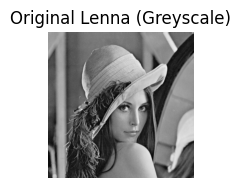

In [6]:
# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(original_img_np, cmap='gray')
plt.title('Original Lenna (Greyscale)')
plt.axis('off')

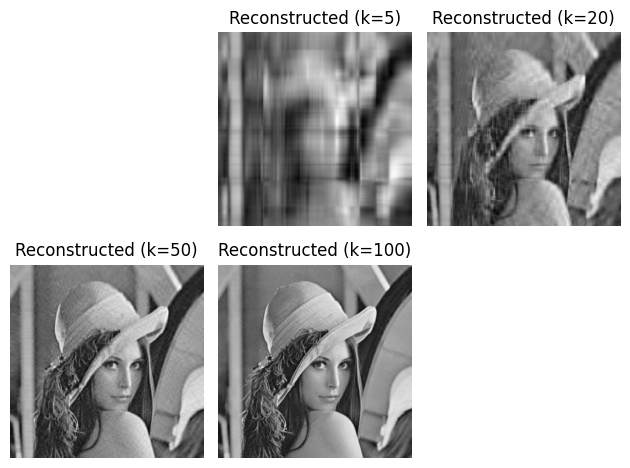

In [7]:
# Loop through k values
for i, k in enumerate(k_values):
    # Create the rank-k approximation
    U_k = U[:, :k]
    Sigma_k = Sigma[:k, :k]
    Vt_k = Vt[:k, :]
    
    reconstructed_img_np = np.dot(U_k, np.dot(Sigma_k, Vt_k))
    reconstructed_img_np = np.clip(reconstructed_img_np, 0, 255)

    # Display the reconstructed image
    plt.subplot(2, 3, i + 2)
    plt.imshow(reconstructed_img_np, cmap='gray')
    plt.title(f'Reconstructed (k={k})')
    plt.axis('off')

plt.tight_layout()
plt.show()

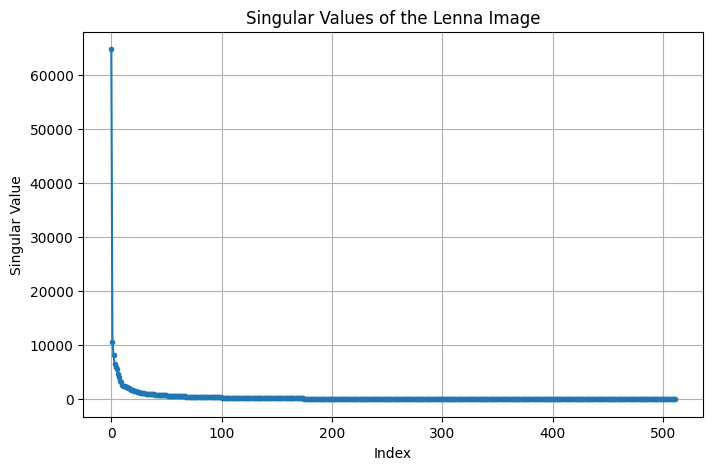

In [8]:
# --- Further Analysis: Plot the Singular Values ---
plt.figure(figsize=(8, 5))
plt.plot(s, 'o-', markersize=3)
plt.title('Singular Values of the Lenna Image')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()